In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt               

import osmnx as ox
import geopandas as gpd            

import esda
from pysal.lib import weights
from splot.esda import lisa_cluster

from src import get_graph as gg
from src import graphlet_degree as gd

/Users/gsagostini/opt/anaconda3/envs/urban-graphlets/lib/python3.9/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/Users/gsagostini/opt/anaconda3/envs/urban-graphlets/lib/python3.9/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Spatial Autocorrelation of Graphlet Degrees

Load the graph and graphlet degree data:

In [2]:
graph_NY = gg.simplify_graph(ox.graph_from_place('New York City, United States', network_type='drive'))
graph_NY_withGDV, node_gdf_NY = gd.add_GDV(graph_NY)

/Users/gsagostini/Desktop/urban-graphlets/notebooks/../src/get_graph.py:57: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  H1 = ox.consolidate_intersections(H, tolerance=tol, dead_ends=True)


Get neighbor relations:

In [3]:
graph_NY_und = ox.get_undirected(graph_NY_withGDV)
NY_neighbors_dict = {pairs[0]: list(pairs[1].keys()) for pairs in graph_NY_und.adjacency()}

Get the weights:

In [4]:
NY_weights_from_graph = weights.W(neighbors=NY_neighbors_dict)

## 1. LISA for Trivial Degree:

Run Local Moran for 0-orbit (trivial degree):

In [5]:
moran_loc_ntwwn_0 = esda.moran.Moran_Local(node_gdf_NY[0].values, NY_weights_from_graph)

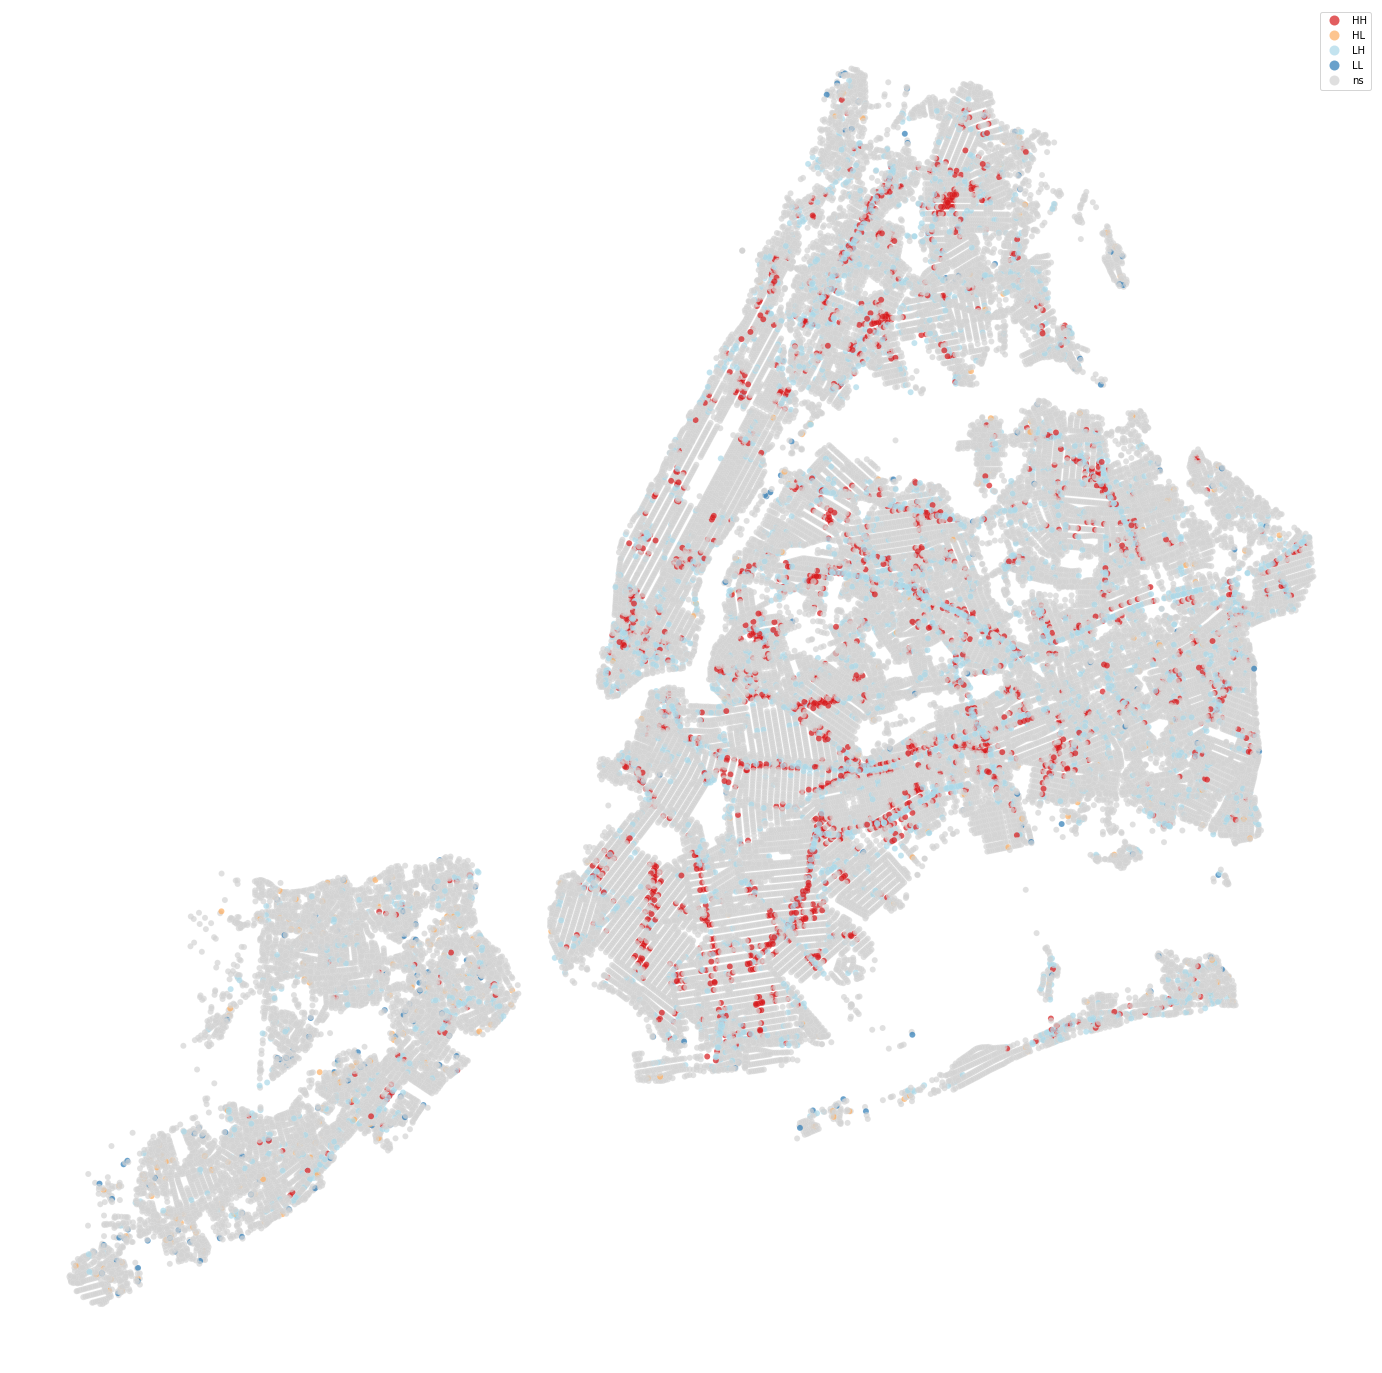

In [6]:
fig, ax = lisa_cluster(moran_loc_ntwwn_0, node_gdf_NY.copy(), figsize = (25,25), alpha=0.7)
plt.show()

## 2. LISA for Square Degree:

In [7]:
moran_loc_ntwwn_square = esda.moran.Moran_Local(node_gdf_NY[8].values, NY_weights_from_graph)

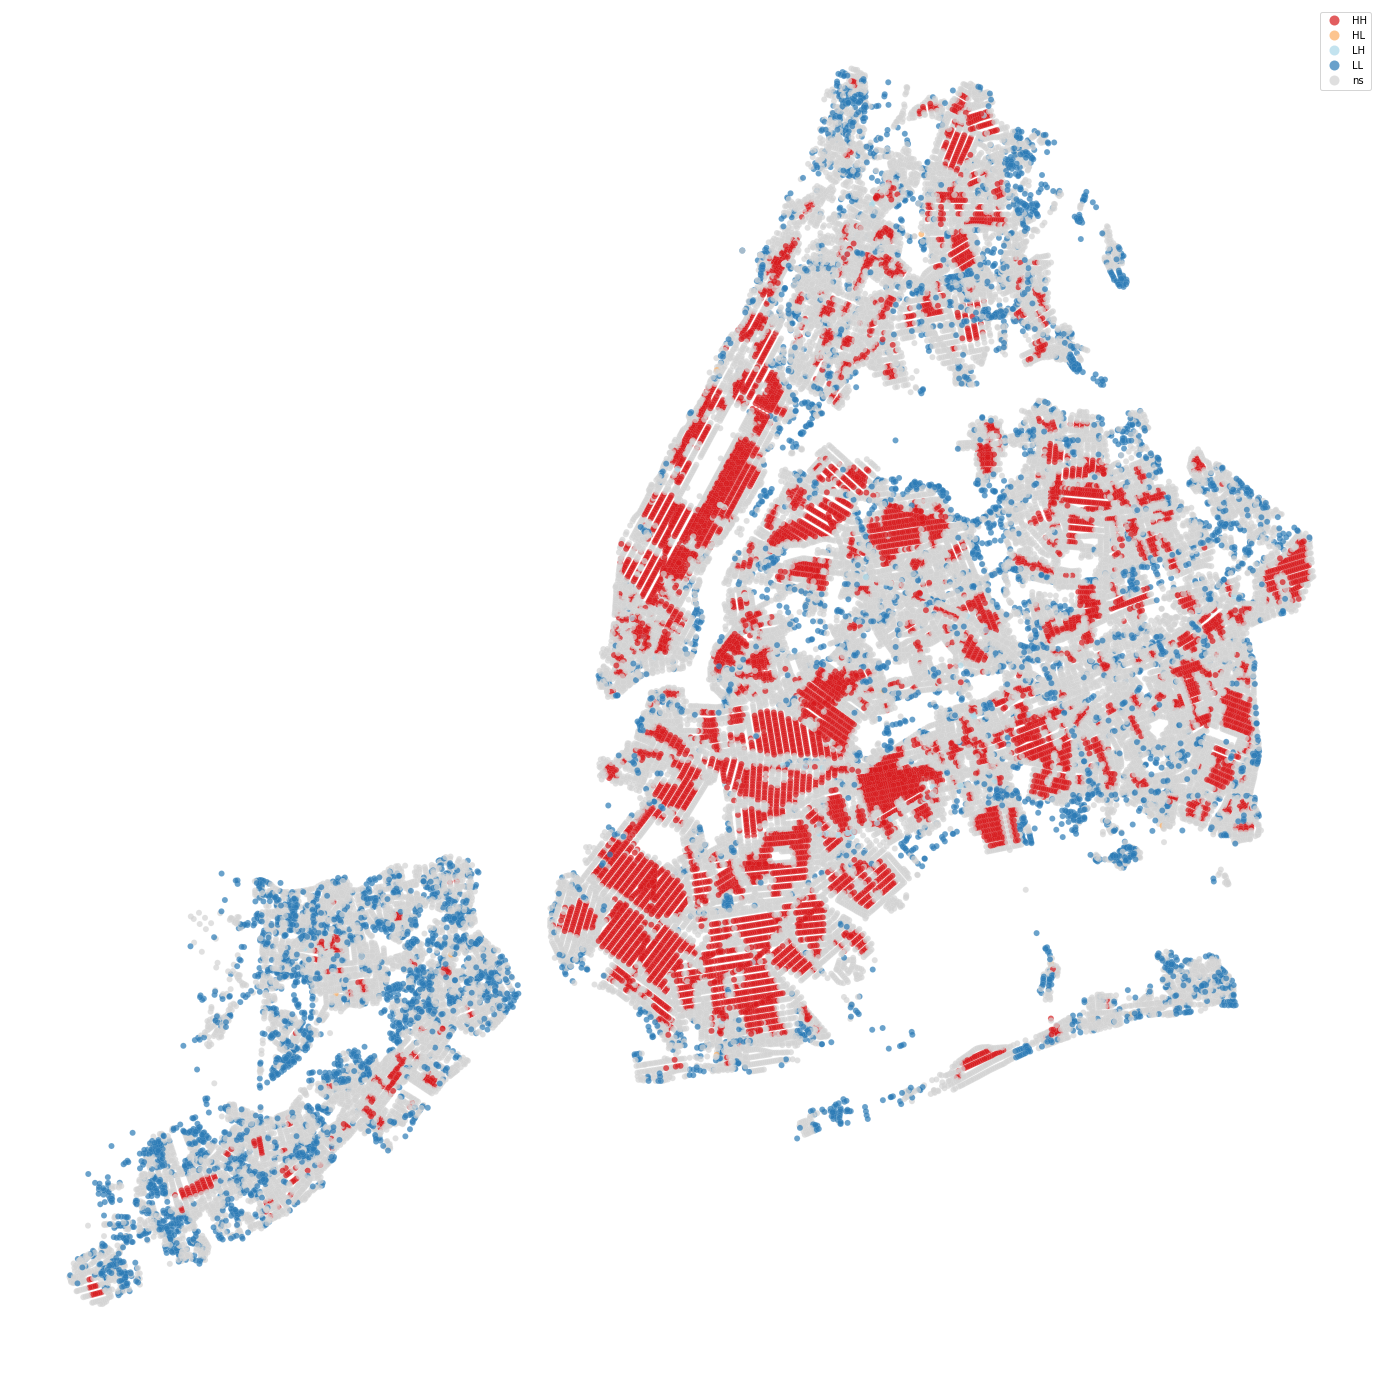

In [8]:
fig, ax = lisa_cluster(moran_loc_ntwwn_square, node_gdf_NY.copy(), figsize=(25,25), alpha=.7)
plt.show()